In [ ]:
# WAVEWATCH III wave height energy and seismic vertical velocity energy
# full workflow from DOWNLOAD TO PLOT

download WWIII data from: 

Wavewatch III Data Download: 
https://pae-paha.pacioos.hawaii.edu/erddap/griddap/ww3_global.html 
https://erddap.aoml.noaa.gov/hdb/erddap/griddap/WaveWatch_2014.html (2014) 
https://erddap.aoml.noaa.gov/hdb/erddap/griddap/WaveWatch_2015.html (2015) 
https://erddap.aoml.noaa.gov/hdb/erddap/griddap/WaveWatch_2016.html (2016)

datetime period: 
2014-11-21T000000Z to 2014-12-31T230000Z
2015-1-1T000000Z to 2015-3-31T230000Z
2015-4-1T000000Z to 2015-6-30T230000Z
2015-7-1T000000Z to 2015-9-30T230000Z
2015-10-1T000000Z to 2015-12-31T230000Z
2016-1-1T000000Z to 2016-3-31T230000Z
2016-4-1T000000Z to 2016-6-30T230000Z
2016-7-1T000000Z to 2016-9-30T230000Z
2016-10-1T000000Z to 2016-11-11T230000Z

variables: 

Tdir (peak wave direction, degrees)
Tper (peak wave period, second)
Thgt (significant wave height, meters)
sdir (swell peak wave direction, degrees)
sper (swell peak wave period, seconds)
shgt (swell significant wave height, meters)
wdir (wind peak wave direction, degrees)
wper (wind peak wave period, seconds)
whgt (wind significant wave height, meters)

Not used in final plots, plotted sometimes to show lack of data:
Grid 1, Nearshore DR01: -72 to -76.5, 170 to 178.5 WEST CORRIDOR 2 (...WEST2_25.csv)

Main data used in wave energy plots:
Grid 2a & 2b: Offshores
a. West Offshore 1 (westernmost, E longitude): 
-67 to -72.5 latitude
173 to 179.5 longitude
file2 = '/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv'

b. West Offshore 2 (easternmost, E longitude): 
-67 to -72.5 latitude
-173 to-179.5 longitude
file1 = '/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_-173to-179pt5_HR.csv'

a + b = c., full section of grid 2 for use in plotting
c. output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_Comb_HR_2.csv"
Each a & b csv file produces 13 values for each lat/lon combination, equally representing each sector so that
when combined, they are equally weighted as a spatial median. 

.../WaveWatch_2015_JanMar_All_WEST_25.csv

BE SURE TO CHANGE HEADERS MANUALLY, and CHUNK SIZE BEFORE PROCEEDING

SPATIAL STATS FOR NEW GRID BOXES: MEDIAN AND MAXIMUM of:
- Thgt_m, Significant Wave Height (Thgt)
- Tper_s, Tper (peak wave period, second) 
- Tdir_deg, Tdir (peak wave direction, degrees) 
  - Tdir_alt (Tdir edited by me to center on N for azimuth plot)

1. Download from ERDDAP sites.


a. Delete row 2 of .csv and rename headers to match previous files
b. Rename first row by copy/pasting these headers in place of old ones: 
time_UTC	latitude_degN	longitude_degE	Tdir_deg	Tper_s	Thgt_m	sdir_deg	sper_s	shgt_m	wdir_deg	wper_s	whgt_m	Tdir_alt
c. Duplicate file, then rename to (same)...copy.csv

In [ ]:
import pandas as pd

# Define the file path
# (-)
file_path = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HR.csv'
output_path = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy.csv'
# (+)
#file_path = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HR.csv'
#output_path = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy.csv'

# Load CSV with first row as headers
df = pd.read_csv(file_path, header=0, na_values=['NaN'])

# Rename columns
df.columns = [
    'time_UTC', 'latitude_degN', 'longitude_degE',
    'Tdir_deg', 'Tper_s', 'Thgt_m',
    'sdir_deg', 'sper_s', 'shgt_m',
    'wdir_deg', 'wper_s', 'whgt_m'
]

# Add empty column
df['Tdir_alt'] = pd.NA

# ✅ Delete second row (index 0 in *data*, which is row 2 in the file)
df = df.drop(index=0).reset_index(drop=True)

# Save to CSV
df.to_csv(output_path, index=False, na_rep='NaN')

print("File saved as:", output_path)


In [ ]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from datetime import datetime 
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.path as mpath
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr

# Load the CSV file

# Jun 2025 new
# (-)
df = pd.read_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy.csv") #main grid (-)
# (+)
#df = pd.read_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy.csv")

# OLD
#df = pd.read_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_BOX1_GRID_25copy.csv") #West Ross Sea Grid (not used)
#df = pd.read_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25copy.csv") #unknown
#df = pd.read_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5copy.csv") #Offshore main grid, a.
#df = pd.read_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_-173to-179pt5copy.csv") #Offshore main grid, b.


In [ ]:
# Jan1-Mar31 2015, chunk size = 168
# Jan1-Mar31 2016, chunk size = 168, the same; it's the 2160 value that changes later to add 1 day (leap year)

# Create _med_hr and _max_hr columns for the Thgt, Tper, Tdir, 
# and the _alt_ columns for shifting the degrees to center on north for better plotting

#~~~0: Transform Peak Wave Direction (Tdir) to Tdir_alt
# #Tdir_deg (peak wave direction, degrees); centered on north so that the caxis looks nice when plotting
df['Tdir_alt'] = df['Tdir_deg'].apply(lambda x: x - 360 if x > 168 else x) #Thgt (significant wave height, meters)

#~~~1: Medians and Max's for Significant Wave height
#Tght medians Thgt_m, Significant Wave Height (Thgt)

# MEDIANS
Thgt_medians = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Thgt_m'].iloc[i:i+168]  # Select 18 values Thgt (significant wave height, meters)
    Thgt_medians.append(chunk.median())     # Compute median
    
# Expand the list to match the original DataFrame length
df['Thgt_m_med'] = [val for val in Thgt_medians for _ in range(168)]

# MAXIMUMS
Thgt_maximums = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Thgt_m'].iloc[i:i+168]  # Select 168 values Thgt (significant wave height, meters)
    Thgt_maximums.append(chunk.max())       # Compute max

# Expand the list to match the original DataFrame length
df['Thgt_m_max'] = [val for val in Thgt_maximums for _ in range(168)]

#~~~2 Medians and Max's for Peak Wave Period
#Tper medians Tper_s, Tper (peak wave period, second) 

Tper_medians = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Tper_s'].iloc[i:i+168]  # Select 168 values Thgt (significant wave height, meters)
    Tper_medians.append(chunk.median())     # Compute median

# Expand the list to match the original DataFrame length
df['Tper_s_med'] = [val for val in Tper_medians for _ in range(168)]

# MAXIMUMS
Tper_maximums = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Tper_s'].iloc[i:i+168]  # Select 168 values Thgt (significant wave height, meters)
    Tper_maximums.append(chunk.max())       # Compute max

# Expand the list to match the original DataFrame length
df['Tper_s_max'] = [val for val in Tper_maximums for _ in range(168)]

#~~~3
#Tdir medians Tdir_deg, Tdir (peak wave direction, degrees) 
# Create an empty list to store median values
Tdir_medians = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Tdir_deg'].iloc[i:i+168]  # Select 168 values Thgt (significant wave height, meters)
    Tdir_medians.append(chunk.median())     # Compute median

# Expand the list to match the original DataFrame length
df['Tdir_deg_med'] = [val for val in Tdir_medians for _ in range(168)]

# MAXIMUMS
Tdir_maximums = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Tdir_deg'].iloc[i:i+168]  # Select 168 values Thgt (significant wave height, meters)
    Tdir_maximums.append(chunk.max())       # Compute max

# Expand the list to match the original DataFrame length
df['Tdir_deg_max'] = [val for val in Tdir_maximums for _ in range(168)]

#~~~4
#Tdir_deg_alt medians 
#Tdir_deg (peak wave direction, degrees); centered on north so that the caxis looks nice when plotting
Tdir_alt_medians = []

# Process data in chunks of 168
for i in range(0, len(df), 168):
    chunk = df['Tdir_alt'].iloc[i:i+168]  # Select 168 values Thgt (significant wave height, meters)
    Tdir_alt_medians.append(chunk.median())     # Compute median

# Expand the list to match the original DataFrame length
df['Tdir_alt_med'] = [val for val in Tdir_alt_medians for _ in range(168)]

# Jun 2025 new
# (-)
df.to_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy2.csv", index=False) #main grid (-)
# (+)
#df.to_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy2.csv", index=False) #main grid (-)

# OLD
#df.to_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25copy2.csv", index=False)
#df.to_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5copy2.csv", index=False)


In [ ]:
# Compute median and max for each unique hour and save as new csv

# LOAD
# Jun 2025 new
# (-)
df = pd.read_csv('/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy2.csv')
# (+)
#df = pd.read_csv('/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy2.csv')

#OLD
# Load the CSV file
#df = pd.read_csv('/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25copy2.csv')
#df = pd.read_csv('/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5copy2.csv')

# Convert 'time_UTC' to datetime format
df['time_UTC'] = pd.to_datetime(df['time_UTC'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a single 'year_jday_hr' column (YYYY_DDD_HH format)
df['year_jday_hr_2'] = df['time_UTC'].dt.strftime('%Y_%j_%H')

# Compute median and max for each unique hour
df_hourly_Thgt = df.groupby('year_jday_hr_2', as_index=False).agg({
    'Thgt_m_med': 'median',  # Thgt medians (Significant Wave Height)
    'Thgt_m_max': 'max'      # Thgt max values
})

df_hourly_Tper = df.groupby('year_jday_hr_2', as_index=False).agg({
    'Tper_s_med': 'median',  # Tper medians (Peak Wave Period)
    'Tper_s_max': 'max'      # Tper max values
})

df_hourly_Tdir = df.groupby('year_jday_hr_2', as_index=False).agg({
    'Tdir_deg_med': 'median',  # Tdir medians (Peak Wave Direction)
    'Tdir_deg_max': 'max',      # Tdir max values
    'Tdir_alt_med': 'median'  # Tdir alt medians (Peak Wave Direction)
})

# Rename columns
df_hourly_Thgt.rename(columns={'Thgt_m_med': 'Thgt_m_med_hr', 'Thgt_m_max': 'Thgt_m_max_hr'}, inplace=True)
df_hourly_Tper.rename(columns={'Tper_s_med': 'Tper_s_med_hr', 'Tper_s_max': 'Tper_s_max_hr'}, inplace=True)
df_hourly_Tdir.rename(columns={'Tdir_deg_med': 'Tdir_deg_med_hr', 'Tdir_deg_max': 'Tdir_deg_max_hr'}, inplace=True)
df_hourly_Tdir.rename(columns={'Tdir_alt_med': 'Tdir_alt_med_hr'}, inplace=True)

# Merge all computed hourly data into a single DataFrame
df_hourly = df_hourly_Thgt.merge(df_hourly_Tper, on='year_jday_hr_2').merge(df_hourly_Tdir, on='year_jday_hr_2')

#Jun 2025 new
# (-)
output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy3.csv"
# (+)
#output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy3.csv"

# Save to a new CSV file
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25copy3.csv"
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5copy3.csv"

df_hourly.to_csv(output_path, index=False)

In [ ]:
# Combine median and max into one hourly csv file

# Jun 2025 new
# (-)
file1 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy2.csv"  # File that will receive new columns
file2 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy3.csv"  # File with columns to add
# (+)
#file1 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy2.csv"  # File that will receive new columns
#file2 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy3.csv"  # File with columns to add

#OLD
# Load the two CSV files
#file1 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25copy2.csv"  # File that will receive new columns
#file2 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25copy3.csv"  # File with columns to add
#file1 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5copy2.csv" # file w/ medians and max's
#file2 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5copy3.csv" # file w/ hourly data

df_main = pd.read_csv(file1)  # Existing data
df_add = pd.read_csv(file2)   # New columns to append

# Ensure they align properly before merging
df_add.reset_index(drop=True, inplace=True)
df_main.reset_index(drop=True, inplace=True)

# Concatenate df_add to the LEFT of df_main
df_combined = pd.concat([df_add, df_main], axis=1)

# Jun 2025 new
# (-)
df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy4.csv", index=False) #hourly
# (+)
#df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy4.csv", index=False) #hourly

#OLD
# Save the updated file (overwrite existing or save as new)
#df_combined.to_csv(file1, index=False)  # Overwrite
#df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_HR.csv", index=False)
#df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv", index=False) #hourly

In [ ]:
# timestamps
# 1Jan-31Jan 2015 = 2160
# 1Jan-31Jan 2016 = ?

# create a time csv to merge with hourly _HR.csv
# column with correct time date format, save as csv

# Define the start time (2015-01-01 at 00:00Z) or (2016-01-01 at 00:00Z)
start_time = datetime(2016, 1, 1, 0, 0)

# Generate 1776 hourly timestamps (for 1/1-3/15/2015); 2160 for 1/1-3/31/2015
#time_series = [start_time + timedelta(hours=i) for i in range(2160)] #2160 for 2015; 2184 for 2016; 
time_series = [start_time + timedelta(hours=i) for i in range(2184)] #2184 for 2016;

# old note: not sure--> ?? #1776 for 2015; 1800 for 2016

# Convert timestamps to the required format
time_series_str = [t.strftime('%Y-%m-%dT%H:%M:%SZ') for t in time_series]

# Create a DataFrame with one column
df = pd.DataFrame({'time_UTC2': time_series_str})

# Save to a new CSV file
# Jun 2025 new
#(-)
output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_time.csv"
#(+)
#output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_time.csv"

df.to_csv(output_path, index=False)

#OLD
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_time.csv"
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_time.csv"


In [ ]:
# Combine time csv content into previous (HR)

# Jun 2025 new
# Load the two CSV files
# (-)
file1 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy4.csv"  # File that will receive new columns
file2 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_time.csv"  # File with columns
# (+)
#file1 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy4.csv"  # File that will receive new columns
#file2 = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_time.csv"  # File with columns

# OLD
#file1 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_HR.csv"  # File that will receive new columns
#file2 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_time.csv"  # File with columns to add
#file1 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv"
#file2 = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_time.csv"

df_main = pd.read_csv(file1)  # Existing data
df_add = pd.read_csv(file2)   # New columns to append

# Ensure they align properly before merging
df_add.reset_index(drop=True, inplace=True)
df_main.reset_index(drop=True, inplace=True)

# Concatenate df_add to the LEFT of df_main
df_combined = pd.concat([df_add, df_main], axis=1)

# Save the updated file (overwrite existing or save as new)
#df_combined.to_csv(file1, index=False)  # Overwrite

# Jan 2025 new
# (-)
df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy5.csv", index=False)
# (+)
#df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy5.csv", index=False)

# OLD
#df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_HR.csv", index=False)
#df_combined.to_csv("/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv", index=False)

In [ ]:
# Extracts only first 9 columns from _HR csv above and saves as new/over-writes 

#Load the CSV file
#Jun 2025 new
# (-)
input_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy5.csv"
# (+)
#input_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy5.csv"

#OLD
#input_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_HR.csv"  
#input_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv"

df = pd.read_csv(input_path)

# Extract the first 9 columns
df_selected = df.iloc[:, :9]

#df_combined.to_csv(input_path, index=False)  # Overwrite

# Save to a new CSV file
# Jun 2025 new
# (-)
output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy6.csv"
# (+)
#output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy6.csv"


df_selected.to_csv(output_path, index=False)

# OLD
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_WEST2_25_HR.csv"  
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv"

In [ ]:
# for all above code, run for _173to175pt5 (west part of grid), then do the same from the top for -173to-175pt5. 
# now you have data prep'd csvs to combine in script below to final output file to plot
# produces /Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_Comb_HR_2.csv to load in plot

In [ ]:
# combine West Offshore 1 (westernmost, E longitude) and West Offshore 2 (easternmost, E longitude) here. 

#Each csv file produces 13 values for each lat/lon combination, equally representing each sector so that
#when combined, they are equally weighted as a spatial median. 

import csv

# Jun 2025 new, keep file 1 and file 2 selected to combine.
# (-)
file1 = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HRcopy6.csv'
# (+)
file2 = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HRcopy6.csv'
output_path = "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HR_Fin.csv"

# OLD
#file1 = '/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_-173to-179pt5_HR.csv'
#file2 = '/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv'
#output_path = "/Users/em/PROJECTS/Swell/DATA/WaveWatch_2015_JanMar_All_NWEST_25_Comb_HR_2.csv"

# Open all files
with open(file1, 'r') as f1, open(file2, 'r') as f2, open(output_path, 'w', newline='') as fout:
    reader1 = csv.reader(f1)
    reader2 = csv.reader(f2)
    writer = csv.writer(fout)

    # Read headers
    header1 = next(reader1)
    header2 = next(reader2)
    
    # Check headers match
    if header1 != header2:
        raise ValueError("Headers do not match between file1 and file2")

    writer.writerow(header1)  # Write header to output

    for row1, row2 in zip(reader1, reader2):
        output_row = []
        for val1, val2, colname in zip(row1, row2, header1):
            if colname == 'time_UTC2':
                output_row.append(val1)  # Keep time as-is
            elif colname == 'year_jday_hr_2':
                output_row.append(val1)  # Assume these are the same
            else:
                try:
                    avg_val = (float(val1) + float(val2)) / 2
                    output_row.append(avg_val)
                except:
                    output_row.append('')  # fallback for non-numeric or missing data
        writer.writerow(output_row)

print(f"Averaged output saved to: {output_path}")


In [3]:
# finally, run matlab code: roseplot4energy.m to get swell-band vert hourly avg data, and lo and hi...
# seislofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR01_001to090_2015_pt03topt06Hz_3Comp_Vert_v.csv'
# seishifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR01_001to090_2015_pt07topt12Hz_3Comp_Vert_v.csv'
# seislofile headers: Time_UTC, Swellbandlo_hourly_avg_v, Swellbandlo_vert_hourly_avg_v
# seishifile headers: Time_UTC, Swellbandhi_hourly_avg_v, Swellbandhi_vert_hourly_avg_v
# wavefile = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR_Fin.csv'
# wavefile headers: time_UTC2, year_jday_hr_2, Thgt_m_med_hr, Thgt_m_max_hr, Tper_s_med_hr, Tper_s_max_hr, Tdir_deg_med_hr, Tdir_deg_max_hr, Tdir_alt_med_hr
# then combine all data but keep only one Time_UTC, sav as ...seis_HR_Fin.csv to load below. 

import pandas as pd

# === File paths === 2015
#seisLofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR01_001to090_2015_pt03topt06Hz_3Comp_Vert_v.csv'
#seisHifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR01_001to090_2015_pt07topt12Hz_3Comp_Vert_v.csv'
#seisLofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR02_001to090_2015_pt03topt06Hz_3Comp_Vert_v.csv'
#seisHifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR02_001to090_2015_pt07topt12Hz_3Comp_Vert_v.csv'
#seisLofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR03_001to090_2015_pt03topt06Hz_3Comp_Vert_v.csv'
#seisHifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR03_001to090_2015_pt07topt12Hz_3Comp_Vert_v.csv'
#wavefile = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR_Fin.csv'

# === File paths === 2016
#seisLofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR01_001to090_2016_pt03topt06Hz_3Comp_Vert_v.csv'
#seisHifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR01_001to090_2016_pt07topt12Hz_3Comp_Vert_v.csv'
#seisLofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR02_001to090_2016_pt03topt06Hz_3Comp_Vert_v.csv'
#seisHifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR02_001to090_2016_pt07topt12Hz_3Comp_Vert_v.csv'
seisLofile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR03_001to090_2016_pt03topt06Hz_3Comp_Vert_v.csv'
seisHifile = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/Energy_all_comp_DR03_001to090_2016_pt07topt12Hz_3Comp_Vert_v.csv'
wavefile = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HR_Fin.csv'

# === Load CSV files ===
seis_lo = pd.read_csv(seisLofile)
seis_hi = pd.read_csv(seisHifile)
wave = pd.read_csv(wavefile)

# === Rename time columns to be consistent ===
seis_lo = seis_lo.rename(columns={'Time_UTC': 'Time_UTC'})
seis_hi = seis_hi.rename(columns={'Time_UTC': 'Time_UTC'})
wave = wave.rename(columns={'time_UTC2': 'Time_UTC'})

# === Convert time columns to datetime === (2015-01-01 00:00:00+00:00) is the default pandas ISO format
seis_lo['Time_UTC'] = pd.to_datetime(seis_lo['Time_UTC'], errors='coerce')
seis_hi['Time_UTC'] = pd.to_datetime(seis_hi['Time_UTC'], errors='coerce')
wave['Time_UTC'] = pd.to_datetime(wave['Time_UTC'], errors='coerce')

# === Merge datasets on Time_UTC ===
merged = pd.merge(seis_lo, seis_hi, on='Time_UTC', how='outer')
merged = pd.merge(merged, wave, on='Time_UTC', how='outer')

# === Sort by time ===
merged = merged.sort_values(by='Time_UTC')

# === Format Time_UTC to ISO format with 'T' and 'Z' === compact ISO 8601 format 2015-01-01T00:00:00Z
merged['Time_UTC'] = merged['Time_UTC'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')

# === Save to new CSV === 2015
#output_file = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv'
#output_file = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv'
#output_file = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv'
#output_file = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv'
#output_file = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv'
#output_file = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv'

# === Save to new CSV === 2016
#output_file = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv'
#output_file = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv'
#output_file = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv'
#output_file = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv'
output_file = '/Users/em/PROJECTS/PEAKTEM/EnergyHrVA/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv'
output_file = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv'
merged.to_csv(output_file, index=False)

print(f"Combined CSV saved to {output_file}")


/var/folders/n_/3zw40qc51xd2r3ngkqw0116h0000gn/T/ipykernel_58628/4169235579.py:33: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  wave = pd.read_csv(wavefile)


Combined CSV saved to /Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv


In [29]:
# check data

#WaveWatch_2015_JanMar_All_NWEST_25_Comb_HR.csv 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# === GLOBAL FONT SETTINGS (MATLAB STYLE) ===
plt.rcParams.update({
    'font.family': 'Helvetica',
    'font.size': 18,
    'axes.labelweight': 'bold',
    'axes.linewidth': 2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 8,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'lines.linewidth': 2,
    'legend.frameon': False
})

# File paths 2015
#file_paths = [
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv' #Northwest sector, offshore
#]

# File paths 2016
file_paths = [
    '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv' #Northwest sector, offshore
]
print(data['Time_UTC'].dt.strftime('%Y-%m-%d').unique())

['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-01-06' '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10'
 '2016-01-11' '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15'
 '2016-01-16' '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20'
 '2016-01-21' '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25'
 '2016-01-26' '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30'
 '2016-01-31' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-06' '2016-02-07' '2016-02-08' '2016-02-09'
 '2016-02-10' '2016-02-11' '2016-02-12' '2016-02-13' '2016-02-14'
 '2016-02-15' '2016-02-16' '2016-02-17' '2016-02-18' '2016-02-19'
 '2016-02-20' '2016-02-21' '2016-02-22' '2016-02-23' '2016-02-24'
 '2016-02-25' '2016-02-26' '2016-02-27' '2016-02-28' '2016-02-29'
 '2016-03-01' '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05'
 '2016-03-06' '2016-03-07' '2016-03-08' '2016-03-09' '2016-03-10'
 '2016-03-11' '2016-03-12' '2016-03-13' '2016-03-14' '2016-03-15'
 '2016-03-

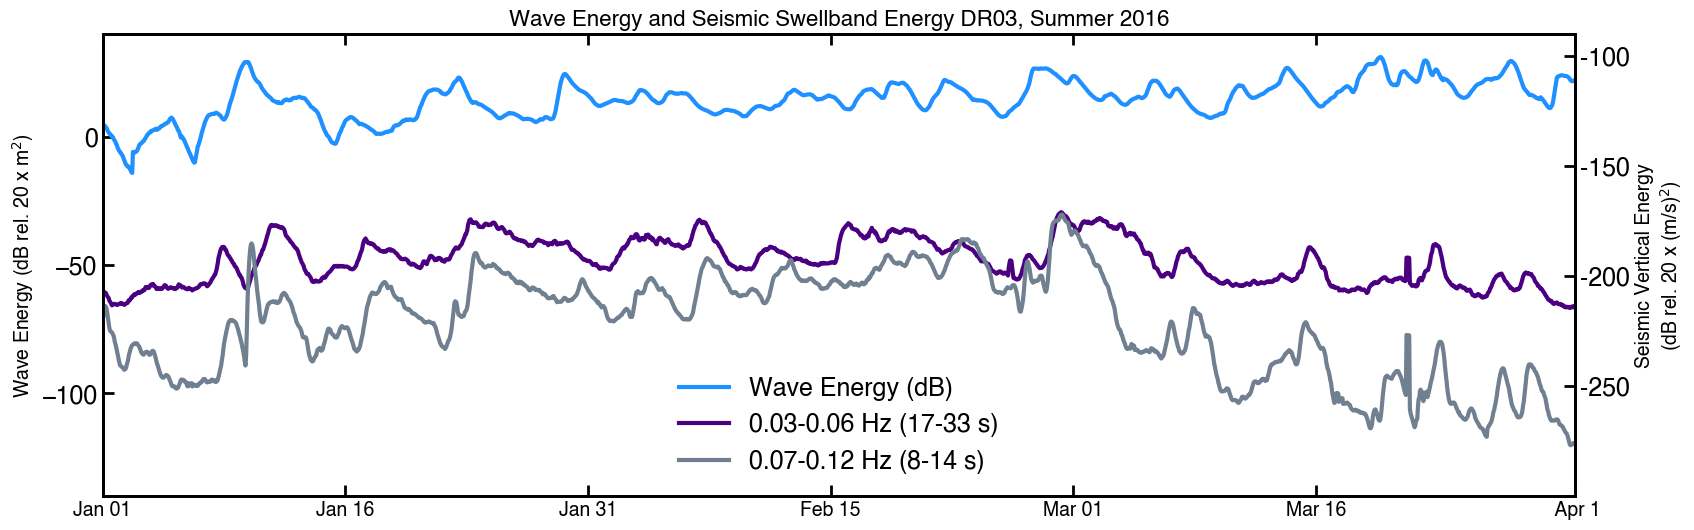

In [31]:
#WaveWatch_2015_JanMar_All_NWEST_25_Comb_HR.csv 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# === GLOBAL FONT SETTINGS (MATLAB STYLE) ===
plt.rcParams.update({
    'font.family': 'Helvetica',
    'font.size': 18,
    'axes.labelweight': 'bold',
    'axes.linewidth': 2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 8,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'lines.linewidth': 2,
    'legend.frameon': False
})

# File paths 2015
#file_paths = [
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv' #Northwest sector, offshore
#]

# File paths 2016
file_paths = [
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR01.csv' #Northwest sector, offshore
    #'/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR02.csv' #Northwest sector, offshore
    '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_HRseis_HR_Fin_DR03.csv' #Northwest sector, offshore
]

# COLUMN 1 in file_paths doc: 'Time_UTC', format: 2015-01-01T00:00:00Z
# Swellbandhi_vert_hourly_avg_v and Swellbandlo_vert_hourly_avg_v
# Thgt_m_med_hr	Thgt_m_max_hr	Tper_s_med_hr	Tper_s_max_hr	Tdir_deg_med_hr	Tdir_deg_max_hr	Tdir_alt_med_hr
# Time_UTC	Swellbandlo_hourly_avg_v	Swellbandlo_vert_hourly_avg_v	Swellbandhi_hourly_avg_v	Swellbandhi_vert_hourly_avg_v	year_jday_hr_2

#fig, ax = plt.subplots(figsize=(15, 4))  # Adjust height as needed
fig, ax = plt.subplots(figsize=(19, 6))

for i, file_path in enumerate(file_paths):
    data = pd.read_csv(file_path)
    # Convert to datetime
    data['Time_UTC'] = pd.to_datetime(data['Time_UTC'], errors='coerce')
    data['Time_UTC'] = data['Time_UTC'].dt.tz_localize(None)
    data['Time_UTC_num'] = mdates.date2num(data['Time_UTC']) #error: ValueError: NaTType does not support astimezone

    # Left y-axis: Wave Energy in dB (now on main ax)
    wave_height = pd.to_numeric(data['Thgt_m_med_hr'], errors='coerce')
    wave_energy = wave_height ** 2
    wave_energy[wave_energy <= 0] = np.nan
    wave_energy_dB = 20 * np.log10(wave_energy)
    
    ax.plot(data['Time_UTC_num'], wave_energy_dB,
            '-', color='dodgerblue', linewidth=3, label="Wave Energy (dB)")
    ax.set_ylabel('Wave Energy (dB rel. 20 x m$^2$)', color='black', fontsize=14)
    #ax.tick_params(axis='y', labelcolor='darkblue', labelsize=14)
        # Left y-axis ticks (main axis)
    ax.tick_params(axis='both', which='both', 
                   direction='in', 
                   length=8, width=2, 
                   labelsize=18, 
                   colors='black')
    
    #ax.set_ylim([np.nanmin(wave_energy_dB) - 5, np.nanmax(wave_energy_dB) + 5])
    ax.set_ylim([-140, 40])
    ax.set_yticks([-100, -50, 0])
    
    # FIGURE TITLES =========== 2015
    #ax.set_title('Wave Energy and Seismic Swellband Energy DR01, Summer 2015', color='black', fontsize=16) #, fontweight='bold')
    #ax.set_title('Wave Energy and Seismic Swellband Energy DR02, Summer 2015', color='black', fontsize=16) #, fontweight='bold')
    #ax.set_title('Wave Energy and Seismic Swellband Energy DR03, Summer 2015', color='black', fontsize=16) #, fontweight='bold')

    # FIGURE TITLES =========== 2016
    #ax.set_title('Wave Energy and Seismic Swellband Energy DR01, Summer 2016', color='black', fontsize=16) #, fontweight='bold')
    #ax.set_title('Wave Energy and Seismic Swellband Energy DR02, Summer 2016', color='black', fontsize=16) #, fontweight='bold')
    ax.set_title('Wave Energy and Seismic Swellband Energy DR03, Summer 2016', color='black', fontsize=16) #, fontweight='bold')
        
    # Right y-axis: Seismic Velocity Bands in dB
    ax_right = ax.twinx()
    #bands = {
    #'Swellbandlo_vert_hourly_avg_v': ('0.03-0.06 Hz (17-33 s)', 'black'),
    #'Swellbandhi_vert_hourly_avg_v': ('0.07-0.12 Hz (8-14 s)', 'darkgray'),
    #}
    bands = {
        #'swellloband_hourly_avg': ('0.03-0.06 Hz (17-33 s)', 'black'), 
        #'swellhiband_hourly_avg': ('0.07-0.12 Hz (8-14 s)', 'darkgray'),
        'Swellbandlo_vert_hourly_avg_v': ('0.03-0.06 Hz (17-33 s)', 'indigo'), 
        'Swellbandhi_vert_hourly_avg_v': ('0.07-0.12 Hz (8-14 s)', 'slategray'),
        #'loband_vert_hourly_avg': ('0.12–1 Hz', 'green'),
        #'midband_vert_hourly_avg': ('1–2 Hz', 'darkorange'),
        #'hiband_vert_hourly_avg': ('2–4 Hz', 'lightcoral'),
    }
    
    # Plotting loop stays the same
    for column, (label, color) in bands.items():
        velocity = data[column].copy()
        velocity = velocity ** 2
        velocity[velocity <= 0] = np.nan

        #smoothing added Jul 2025
        # === Apply smoothing (e.g., 5-point moving average) ===
        velocity = velocity.rolling(window=5, center=True, min_periods=1).mean()
        
        velocity_dB = 20 * np.log10(velocity)
        ax_right.plot(
            data['Time_UTC_num'],
            velocity_dB,
            '-', 
            label=f'{label}', 
            color=color,
            linewidth=3,
            #alpha=0.3
        )
    
    #ax_right.legend(fontsize=16) 
    #legend = ax_right.legend(loc='lower center', fontsize=14, frameon=False) #lower right

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax_right.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=18, frameon=False)

    
    ax_right.set_ylabel('Seismic Vertical Energy\n(dB rel. 20 x (m/s)$^2$)', color='black', fontsize=14)
    #ax_right.tick_params(axis='y', labelcolor='black', labelsize=14)
    # Right y-axis ticks (seismic bands)
    ax_right.tick_params(axis='both', which='both', 
                         direction='in', 
                         length=8, width=2, 
                         labelsize=18, 
                         colors='black')
    #ax_right.legend(loc='lower right', fontsize=10)
    ax_right.set_ylim([-300, -90])
    ax_right.set_yticks([-100, -150, -200, -250])
    ax_right.set_yticklabels(['-100', '-150', '-200', '-250'])

    #ax_right.spines['right'].set_position(('outward', 60))
    #ax_right.spines['right'].set_color('black')
    yticks = ax_right.get_yticks()  # Get current y-ticks 
    ytick_labels = [str(int(t)) if t != -300 else '' for t in yticks]  # Create labels: remove -300 label
    
    # Apply ticks and labels
    ax_right.set_yticks(yticks)
    ax_right.set_yticklabels(ytick_labels)
    ax_right.yaxis.set_label_position('right')
    ax_right.yaxis.set_ticks_position('right')

    # Set x-axis limits
    ax.set_xlim([data['Time_UTC_num'].min(), data['Time_UTC_num'].max()])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', labelcolor='black', labelsize=18) #14
    ax.tick_params(axis='x', which='both',
               direction='in',
               top=True,    
               labeltop=False,  # Add labels at top
               bottom=True,
               labelbottom=True,
               labelcolor='black',
               labelsize=18, 
               length=8, width=2, colors='black')

import datetime

# === Define custom tick dates === 2015
#tick_dates = [
#    datetime.datetime(2015, 1, 1),
#    datetime.datetime(2015, 1, 16),
#    datetime.datetime(2015, 1, 31),
#    datetime.datetime(2015, 2, 15),
#    datetime.datetime(2015, 3, 2),
#    datetime.datetime(2015, 3, 17),
#    datetime.datetime(2015, 4, 1)
#]

# === Define custom tick dates === 2016
tick_dates = [
    datetime.datetime(2016, 1, 1),
    datetime.datetime(2016, 1, 16),
    datetime.datetime(2016, 1, 31),
    datetime.datetime(2016, 2, 15),
    datetime.datetime(2016, 3, 1),
    datetime.datetime(2016, 3, 16),
    datetime.datetime(2016, 4, 1)
]

# === Convert to Matplotlib date numbers ===
tick_nums = mdates.date2num(tick_dates)

# === Apply to x-axis ===
ax.set_xticks(tick_nums)
#2015:
#ax.set_xticklabels(['Jan 01', 'Jan 16', 'Jan 31', 'Feb 15', 'Mar 02', 'Mar 17', ' Apr 1'], fontsize=14, color='black')
#2016:
ax.set_xticklabels(['Jan 01', 'Jan 16', 'Jan 31', 'Feb 15', 'Mar 01', 'Mar 16', ' Apr 1'], fontsize=14, color='black')
plt.xticks(rotation=0)  # Optional for better readability
#plt.title('WW3 Offshore Wave Height and DR01 Station Energy Band Comparison')
#plt.tight_layout()

# ======== 2015 ============
#plt.savefig('/Users/em/PROJECTS/Swell/FIGS/Jun25/2015DR01Swellband_V_WaveEOffshore_3.png', format='png', dpi=600, bbox_inches='tight')
#plt.savefig('/Users/em/PROJECTS/Swell/FIGS/Jun25/2015DR02Swellband_V_WaveEOffshore_3.png', format='png', dpi=600, bbox_inches='tight')
#plt.savefig('/Users/em/PROJECTS/Swell/FIGS/Jun25/2015DR03Swellband_V_WaveEOffshore_3.png', format='png', dpi=600, bbox_inches='tight')

# ======== 2016 ============
#plt.savefig('/Users/em/PROJECTS/Swell/FIGS/Jun25/2016DR01Swellband_V_WaveEOffshore_3.png', format='png', dpi=600, bbox_inches='tight')
#plt.savefig('/Users/em/PROJECTS/Swell/FIGS/Jun25/2016DR02Swellband_V_WaveEOffshore_3.png', format='png', dpi=600, bbox_inches='tight')
plt.savefig('/Users/em/PROJECTS/Swell/FIGS/Jun25/2016DR03Swellband_V_WaveEOffshore_3.png', format='png', dpi=600, bbox_inches='tight')

plt.show()

Show that Jan-Mar 2015 and 2016 are the only data periods with high enough non-NaN values to analyze. 
In the others (Oct-Dec for ex.), the data are too sparse for the selected grid are. 
This is because of the sea ice forming in the grid area during the non-summer periods, no valid WW3 data. 

In [ ]:
import pandas as pd

# === 1. Define file paths ===
file_paths = [
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2014_NovDec_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2014_NovDec_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JanMar_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_AprJun_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_AprJun_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JulSep_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_JulSep_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_OctDec_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2015_OctDec_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JanMar_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_AprJun_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_AprJun_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JulSep_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_JulSep_All_NWEST_25_173to179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_OctNov_All_NWEST_25_-173to-179pt5_HR.csv",
    "/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_2016_OctNov_All_NWEST_25_173to179pt5_HR.csv"
]

# === 2. Create output table structure ===
results = []

# === 3. Loop over files ===
for file_path in file_paths:
    try:
        # Create a row label based on the filename
        filename = file_path.split('/')[-1]
        row_label = filename.replace('WaveWatch_', '').replace('_All_NWEST_25_', '').replace('_HR.csv', '')

        # Load the CSV (header row is row 0, units row is row 1, so drop it after load)
        df = pd.read_csv(file_path, header=0, na_values=['NaN'])

        # Rename columns to match expected headers
        df.columns = [
            'time_UTC', 'latitude_degN', 'longitude_degE',
            'Tdir_deg', 'Tper_s', 'Thgt_m',
            'sdir_deg', 'sper_s', 'shgt_m',
            'wdir_deg', 'wper_s', 'whgt_m'
        ]

        # Delete second row (units row)
        df = df.drop(index=0).reset_index(drop=True)

        # Count NaN values in 'Tdir_deg'
        num_nan = df['Tdir_deg'].isna().sum()

        # Count total number of entries in 'Tdir_deg'
        total_entries = df['Tdir_deg'].shape[0]

        # Append to results
        results.append([row_label, num_nan, total_entries])

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        results.append([row_label, 'Error', 'Error'])

# === 4. Create DataFrame for output ===
results_df = pd.DataFrame(results, columns=['File_Name', 'Number_of_NaN', 'Total_Number'])

# === 5. Save to CSV ===
output_path = '/Users/em/PROJECTS/Swell/DATA/Jun25/WaveWatch_datareview_HR.csv'
results_df.to_csv(output_path, index=False)

print(f"Data review table saved to {output_path}")
